# Credit cards - Fraud Detection

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import openml


from sklearn.model_selection import train_test_split




## Loading the dataset

In [2]:
credit_fraud_data=openml.datasets.get_dataset(1597)

print(f"This is dataset '{credit_fraud_data.name}", "the target feature is ",
    f"'{credit_fraud_data.default_target_attribute}'")

X, y, categorical_indicator, attribute_names = credit_fraud_data.get_data(target=credit_fraud_data.default_target_attribute, dataset_format="dataframe")
X.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

print(X.info())
print(credit_fraud_data.description)

This is dataset 'creditcard the target feature is  'Class'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  fl

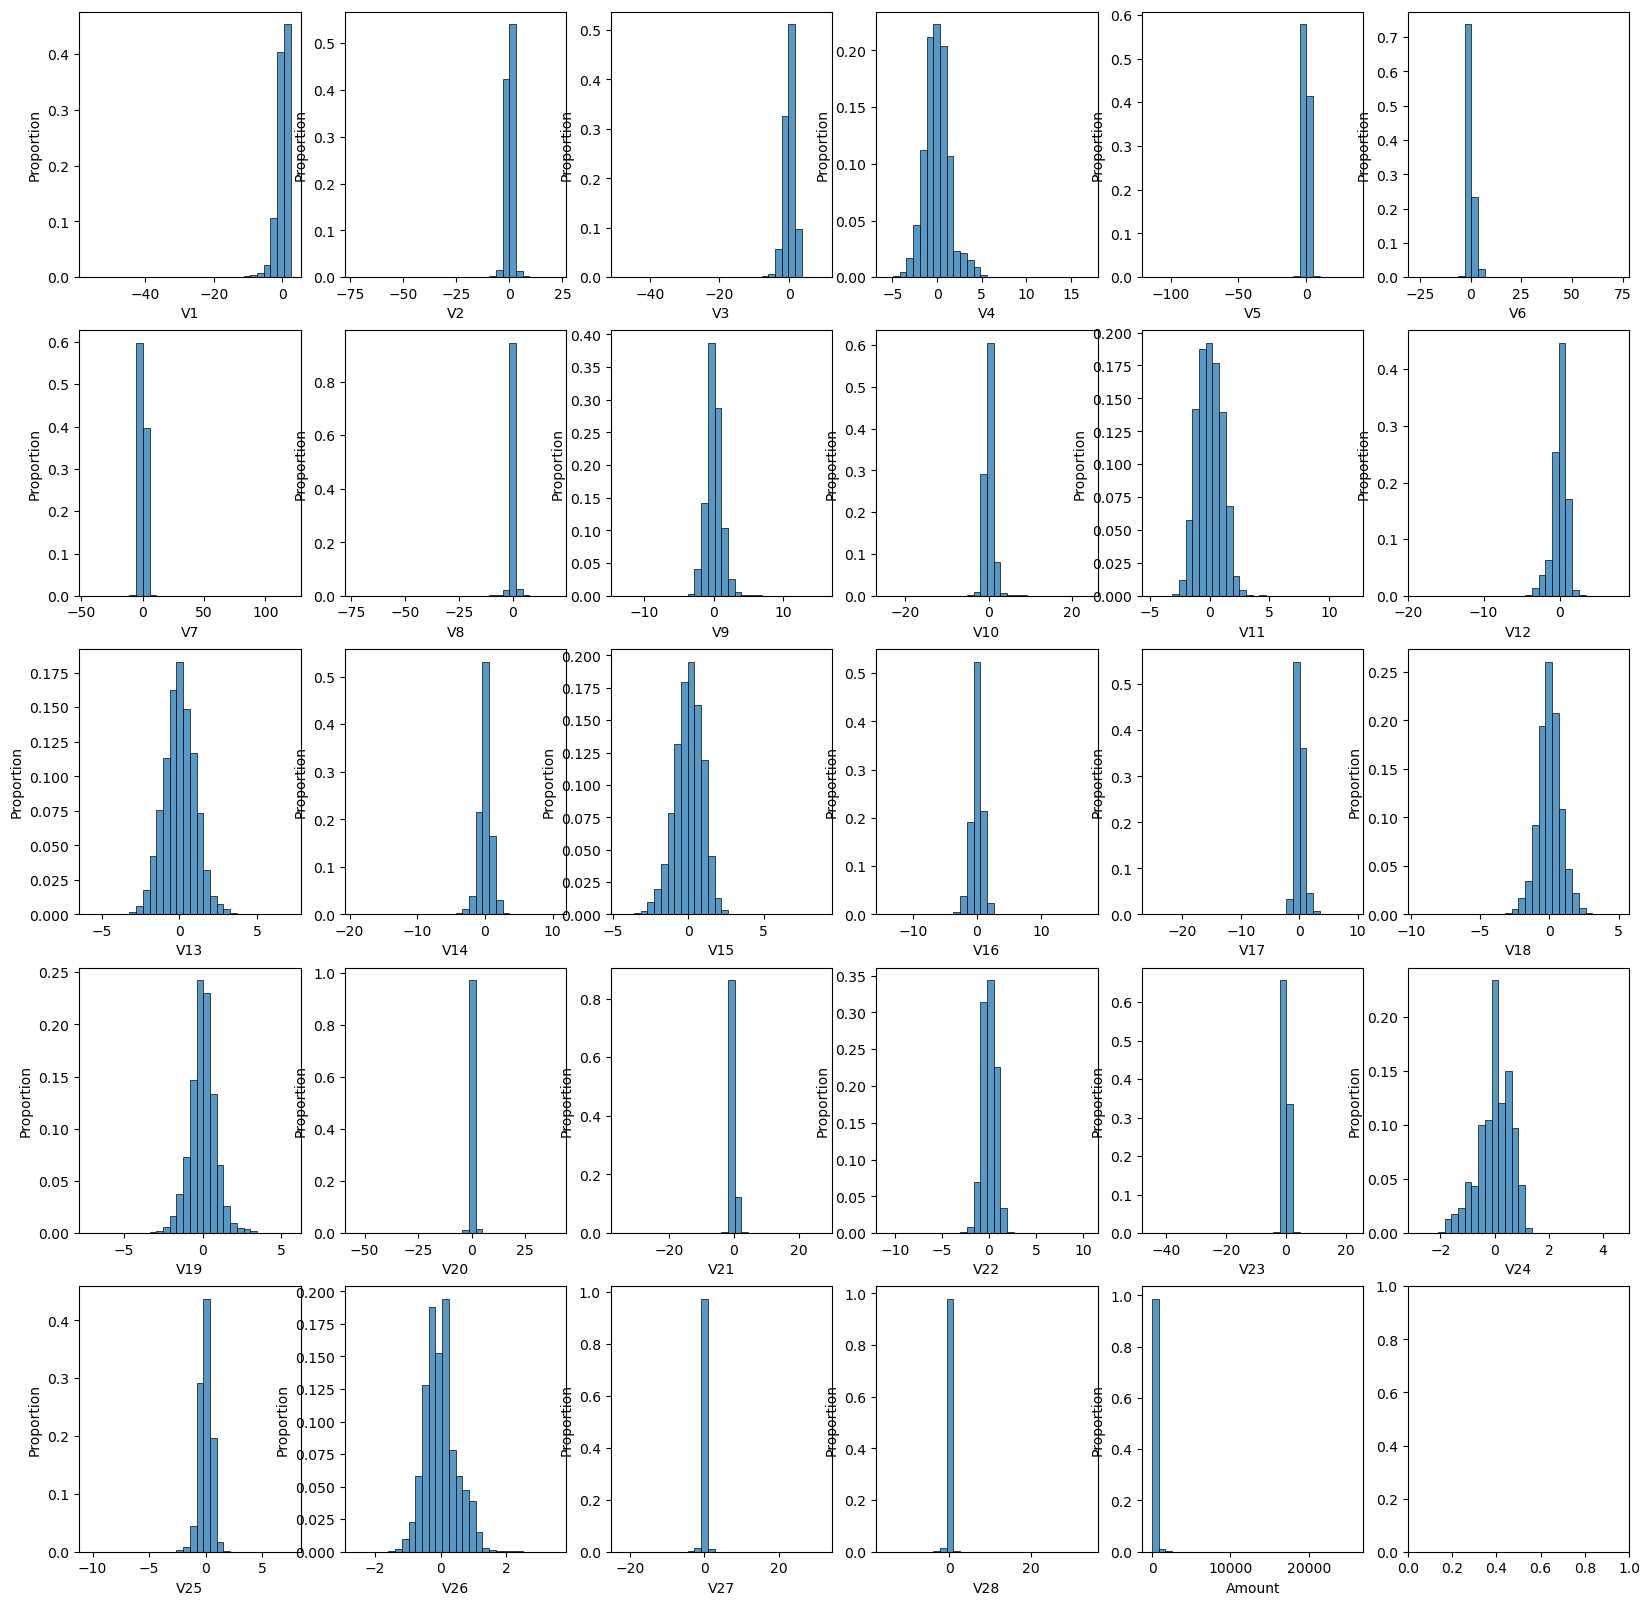

In [3]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))
for i in range(5):
    for j in range(6):
        if 6*i+j<29:
                sn.histplot(X[X.columns[6 * i + j]],stat='proportion',bins=30, ax=axs[i,j])
plt.show()



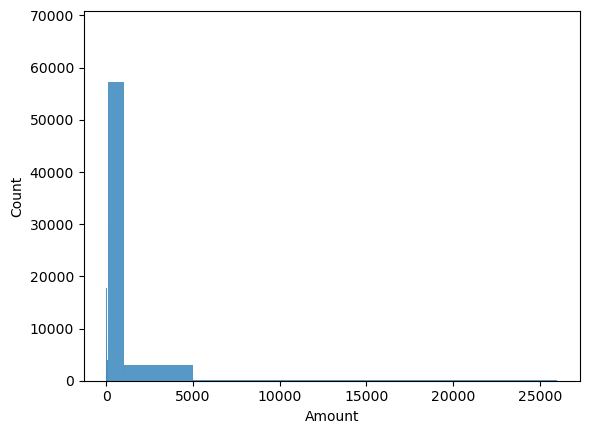

284807

In [5]:
sn.histplot(data=X[X.columns[28]], bins=np.array(list(range(0,100,5))+[1000,5000,26000]))
plt.show()

y.count()

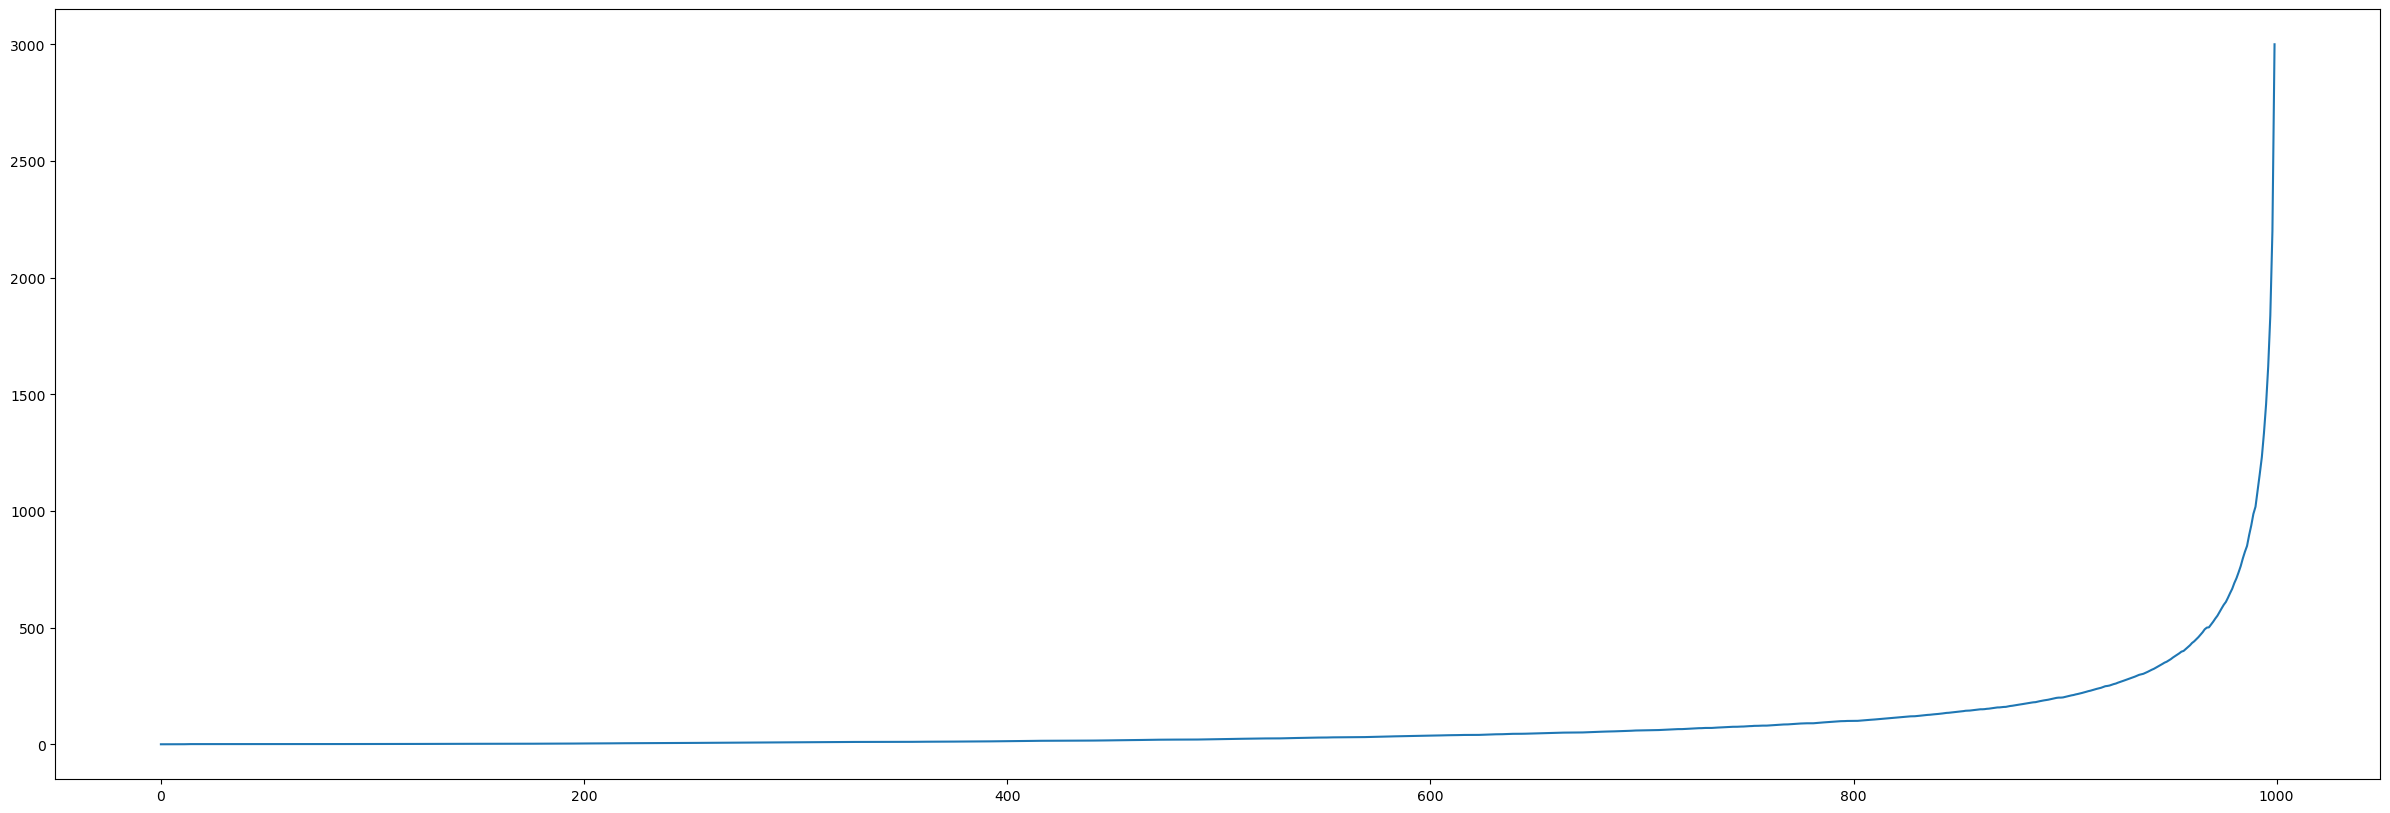

1017.9700000000012

In [6]:
Amount_cum_sum=[]

for k in range(0,1000):
    percentile=X['Amount'].quantile(k/1000)
    Amount_cum_sum.append(percentile)

f , ax=plt.subplots(figsize=(30,10))
plt.plot(Amount_cum_sum)
plt.show()

X['Amount'].quantile(0.99)

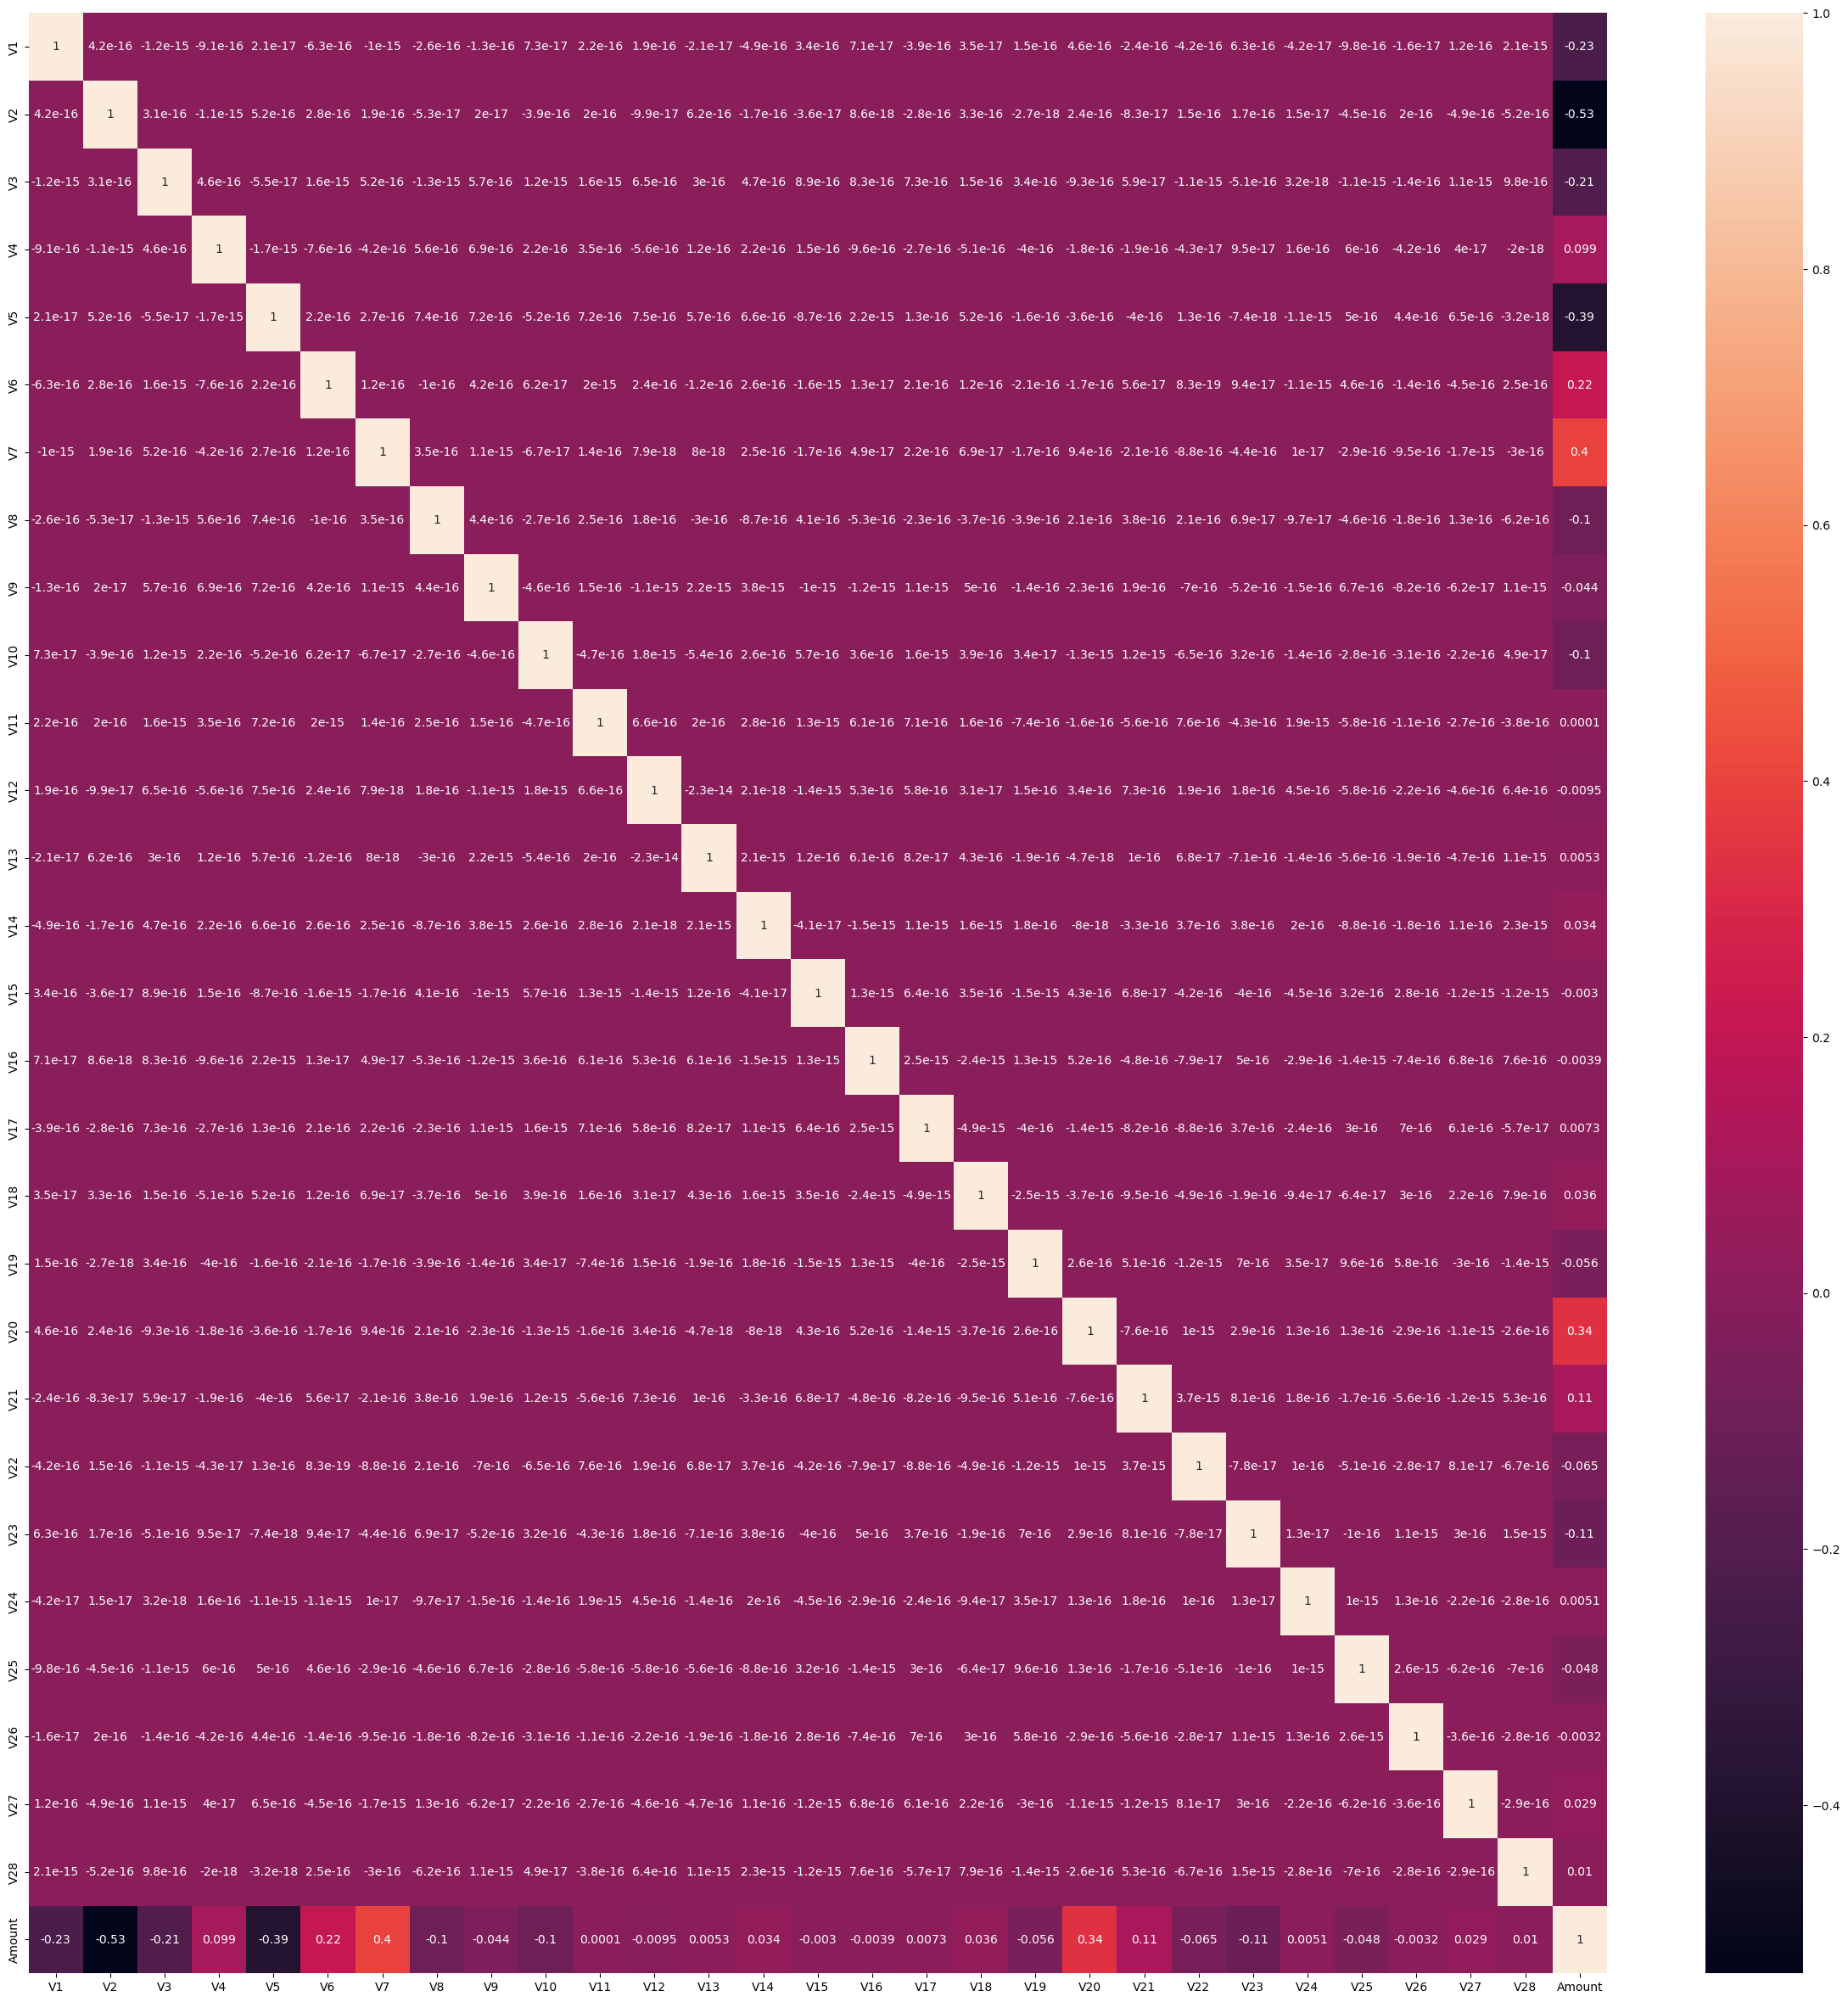

In [7]:
f , ax=plt.subplots(figsize=(30,30))
sn.heatmap(X.corr(), annot=True)
plt.show()

# Data pre-processing

In [8]:
train_df=pd.concat([X_train,y_train], axis=1)
fraud_df=train_df.loc[train_df['Class']=='1']
genuine_df=train_df.loc[train_df['Class']=='0'].sample(len(fraud_df))


train_df_balnc=pd.concat([fraud_df,genuine_df], axis=0).sample(frac=1)

X_train_balnc=train_df_balnc.loc[:, train_df_balnc.columns != 'Class']
y_train_balnc=train_df_balnc.loc[:,'Class']

y_train_balnc.describe()

count     810
unique      2
top         0
freq      405
Name: Class, dtype: object

## Linear discriminant

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='lsqr',store_covariance=True)

lda.fit(X_train, y_train)

lda_pred=lda.predict(X_test)



lda_balnc = LinearDiscriminantAnalysis(solver='lsqr',store_covariance=True)

lda_balnc.fit(X_train_balnc, y_train_balnc)

lda_pred_balnc=lda_balnc.predict(X_test)




array([False,  True])

## Bernoulli naive Bayes

In [41]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

bnb_pred =bnb.predict(X_test)

print(bnb_pred)

bnb_balnc = BernoulliNB()

bnb_balnc.fit(X_train_balnc, y_train_balnc)

bnb_pred_balnc =bnb_balnc.predict(X_test)

print(bnb_pred_balnc)

['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']


## Linear support vector machine

In [42]:
from sklearn.svm import LinearSVC

svc=LinearSVC(max_iter=1000)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

print(svc_pred)

svc_balnc=LinearSVC(max_iter=1000)
svc_balnc.fit(X_train_balnc,y_train_balnc)
svc_pred_balnc=svc_balnc.predict(X_test)

print(svc_pred_balnc)

['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']


/Users/eita/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/eita/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(max_depth=3)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

print(rf_pred)

rf_balnc= RandomForestClassifier(max_depth=3)
rf_balnc.fit(X_train_balnc,y_train_balnc)
rf_pred_balnc=rf_balnc.predict(X_test)

print(rf_pred_balnc)

['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']


## Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr_pred_proba=lr.predict_proba(X_test)
lr_pred=lr.predict(X_test)

lr_pred_thresh=np.column_stack((lr_pred,lr_pred_proba[:,1]))


lr_balnc=LogisticRegression(max_iter=1000)
lr_balnc.fit(X_train_balnc,y_train_balnc)
lr_pred_balnc=lr_balnc.predict(X_test)



In [46]:
lr_pred_0=np.array([i for i in lr_pred_thresh if i[0]=='0'])
lr_pred_1=np.array([i for i in lr_pred_thresh if i[0]=='1'])

print(min(lr_pred_1[:,1]))
print(max(lr_pred_0[:,1]))

np.unique(lr_pred==lr_pred_balnc)

0.5840516506792385
0.4611743494247128


array([False,  True])

# Comparing the classifiers

### 1. Confusion matrix

Linear discriminant 
 Accuracy= 0.999385555282469 
 Precision= 0.8421052631578947 
 Recall= 0.735632183908046 
 F1_score= 0.7852760736196318
Naive Bayes 
 Accuracy= 0.9991222218320986 
 Precision= 0.7681159420289855 
 Recall= 0.6091954022988506 
 F1_score= 0.6794871794871794
Logistic regression 
 Accuracy= 0.9991397773954567 
 Precision= 0.8275862068965517 
 Recall= 0.5517241379310345 
 F1_score= 0.6620689655172414
Linear SVC 
 Accuracy= 0.9986306660580738 
 Precision= 0.5398230088495575 
 Recall= 0.7011494252873564 
 F1_score= 0.61
Random forest 
 Accuracy= 0.9991397773954567 
 Precision= 0.8166666666666667 
 Recall= 0.5632183908045977 
 F1_score= 0.6666666666666665


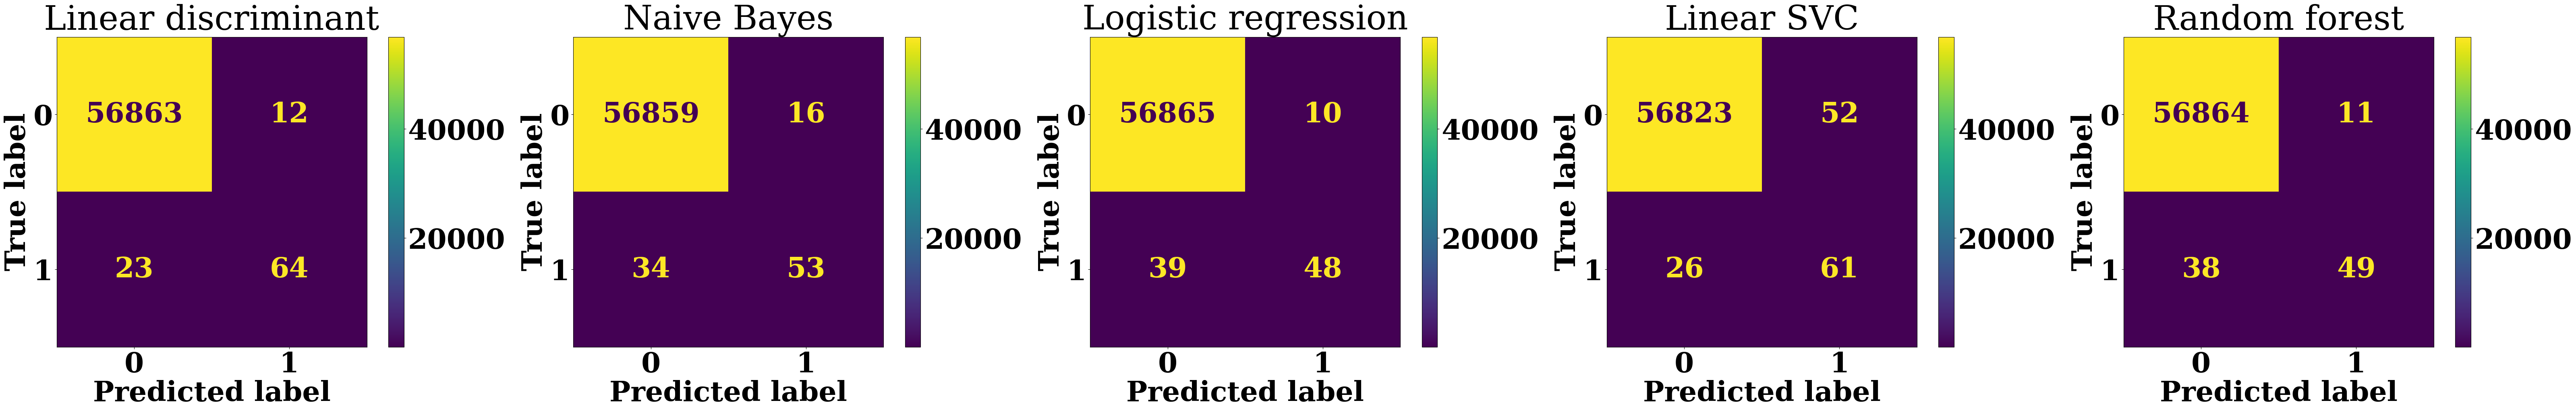

Linear discriminant 
 Accuracy= 0.9870966609318493 
 Precision= 0.08673469387755102 
 Recall= 0.7816091954022989 
 F1_score= 0.15614236509758897
Naive Bayes 
 Accuracy= 0.9934693304308135 
 Precision= 0.1566265060240964 
 Recall= 0.7471264367816092 
 F1_score= 0.2589641434262948
Logistic regression 
 Accuracy= 0.979442435307749 
 Precision= 0.061488673139158574 
 Recall= 0.8735632183908046 
 F1_score= 0.11489040060468632
Linear SVC 
 Accuracy= 0.9770899898177733 
 Precision= 0.05088495575221239 
 Recall= 0.7931034482758621 
 F1_score= 0.09563409563409564
Random forest 
 Accuracy= 0.9947157754292335 
 Precision= 0.199438202247191 
 Recall= 0.8160919540229885 
 F1_score= 0.32054176072234764


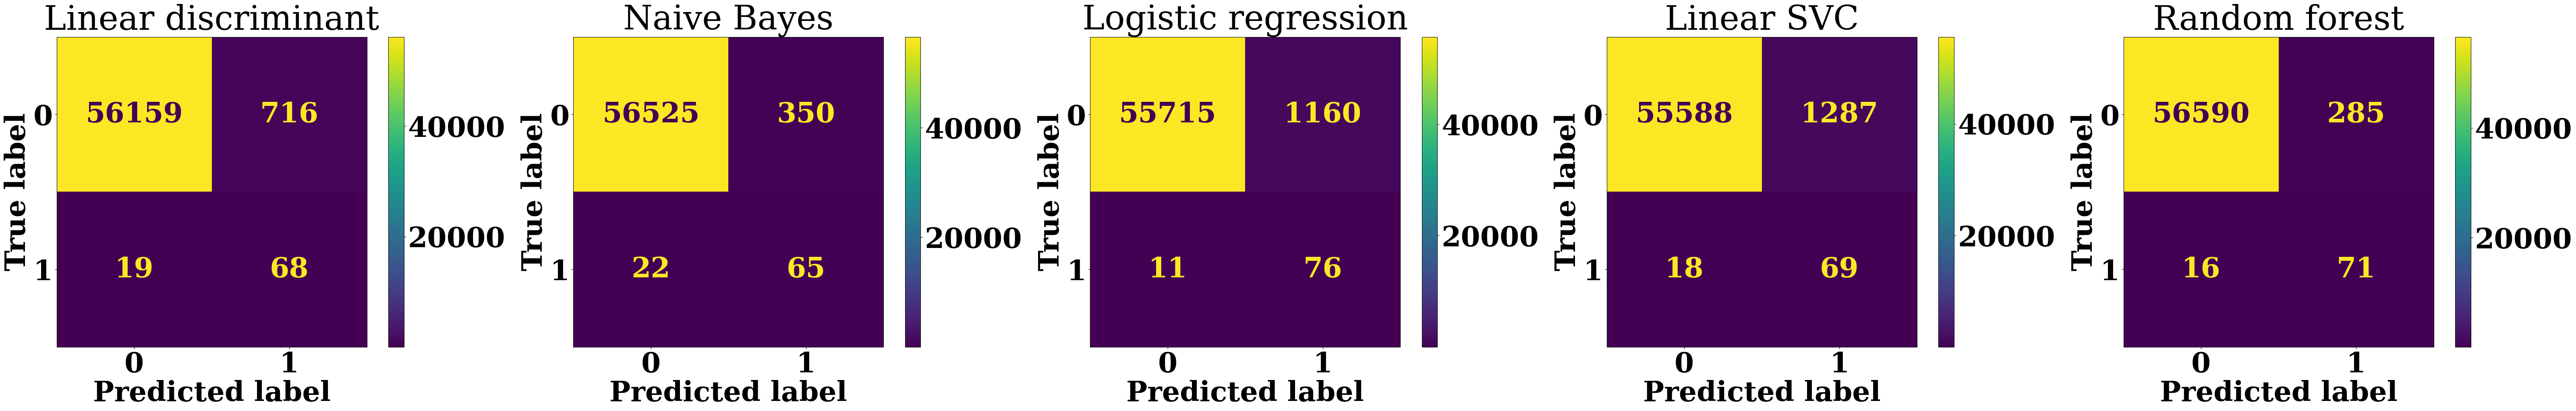

In [63]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

predictions=[lda_pred, bnb_pred, lr_pred, svc_pred, rf_pred]
classes=[lda.classes_, bnb.classes_, lr.classes_, svc.classes_, rf.classes_]
names=['Linear discriminant', 'Naive Bayes', 'Logistic regression', 'Linear SVC', 'Random forest']



fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(80, 10))
for index in range (5):
    cm=confusion_matrix(y_test, predictions[index], labels=classes[index])
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    prec=cm[1,1]/(cm[1,1]+cm[0,1])
    rec=cm[1,1]/(cm[1,1]+cm[1,0])
    F1=2*rec*prec/(rec+prec)
    font = {'family' : 'serif',
    'weight' : 'bold',
    'size'   : 50}
    plt.rc('font', **font)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[index])
    disp.plot(ax=axs[index])
    axs[index].title.set_text(names[index])
    print(names[index],'\n',
    'Accuracy=',acc,'\n',
    'Precision=', prec,'\n',
    'Recall=',rec ,'\n',
    'F1_score=',F1
    )
plt.show()


predictions=[lda_pred_balnc, bnb_pred_balnc, lr_pred_balnc, svc_pred_balnc, rf_pred_balnc]
classes=[lda_balnc.classes_, bnb_balnc.classes_, lr_balnc.classes_, svc_balnc.classes_, rf_balnc.classes_]
names=['Linear discriminant', 'Naive Bayes', 'Logistic regression', 'Linear SVC', 'Random forest']



fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(80, 10))
for index in range (5):
    cm=confusion_matrix(y_test, predictions[index], labels=classes[index])
    acc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    prec=cm[1,1]/(cm[1,1]+cm[0,1])
    rec=cm[1,1]/(cm[1,1]+cm[1,0])
    F1=2*rec*prec/(rec+prec)
    font = {'family' : 'serif',
    'weight' : 'bold',
    'size'   : 50}
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[index])
    disp.plot(ax=axs[index])
    axs[index].title.set_text(names[index])
    print(names[index],'\n',
    'Accuracy=',acc,'\n',
    'Precision=', prec,'\n',
    'Recall=',rec ,'\n',
    'F1_score=',F1
    )
plt.show()
